# Assigment 2

Juan Navarro, <jsnavarroa@unal.edu.co>

## 1. (2.5) Use the following code to generate a dataset

```python
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
plt.scatter(X[:, 0], X[:, 1], marker=’o’, c=y, edgecolor=’k’)
```

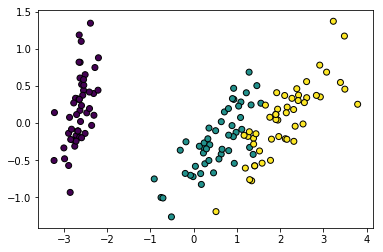

In [125]:
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

### (a) Use the data for classes 1 and 2 to estimate the parameters of a bivariate Gaussian distribution for each class. Assume that the covariance matrix is the same for both classes. Write the parameters of the probability distribution functions for both classes.

In [126]:
import numpy as np

from sklearn.mixture import GaussianMixture

# Use only data from the 1 and 2 classes
ix = np.isin(y, [1, 2])
x12 = Xorig[ix]
y12 = y[ix]

# Try GMMs
n_classes = len(np.unique(y12))
estimators = GaussianMixture(n_components=n_classes, covariance_type='tied', max_iter=20, random_state=0)

estimators.fit(x12, y12)

print("Means \n", estimators.means_) 

print("Variances \n", np.diagonal(estimators.covariances_))

Means 
 [[6.01326724 2.81153998 4.37801991 1.35698388]
 [6.54591121 2.94101092 5.50865268 2.0401348 ]]
Variances 
 [0.36433898 0.1054446  0.35657639 0.06246013]


(b) Write a Python function that calculates the discriminant function for each class.

In [127]:
def discriminant(x, classes):
    # we use the 0/1 loss function
    # g_i (x) = P (C_i |x)
    return estimators.predict_proba(x)

discriminant(x12[0:3], np.unique(y12))



array([[9.99965545e-01, 3.44547236e-05],
       [9.99674756e-01, 3.25244344e-04],
       [9.98964945e-01, 1.03505534e-03]])

(c) Draw a plot, where the regions corresponding to the different classes are shown with
different colors. A region corresponding to a class is the set of points where the particular
class discriminant function is maximum (decision regions, [Alp10] Sect. 3.4).

[[1.00000000e+00 4.63518111e-14]
 [1.00000000e+00 6.51493384e-14]
 [1.00000000e+00 9.15700206e-14]
 ...
 [3.51334864e-04 9.99648665e-01]
 [2.49989618e-04 9.99750010e-01]
 [1.77872987e-04 9.99822127e-01]]


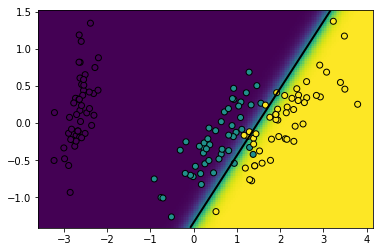

In [137]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')


# 
colors = ['navy', 'turquoise', 'darkorange']
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
mesh = np.c_[xx.ravel(), yy.ravel()]

meshOrig = pca.inverse_transform(mesh)

Z = discriminant(meshOrig, np.unique(y12))

Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z , alpha=5)

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

plt.show()

(d) The boundary between both class regions must be a line. Calculate the equation of this
line clearly explaining the deduction process. Draw the line along with the regions.

(e) What happens with the boundary line if we change the prior probabilities of the classes?
Illustrate with a graphical example.

## 2. (1.0) Repeat steps (a) to (c) from previous item, but this time:

(a) Use data from the three classes.

(b) Estimate a different covariance matrix for each class.

## 3. (1.5) Repeat the previous item, but this time:

(a) Use only a portion of the dataset (80% of the samples) to estimate the parameters of
the probability distribution functions of each class.

(b) Write a function that calculates the discriminant function for each class, taking into
account the possibility of rejection with a cost λ and cost 1 for misclassification ([Alp10]
Eq. (3.10)). Look for values of λ that produce a rejection region easily distinguishable
from the other regions.

(c) Classify the rest of the dataset that was not used for estimation (20%), using a classifier
based on the discriminant functions. Evaluate the results using a confusion matrix.